In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [5]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


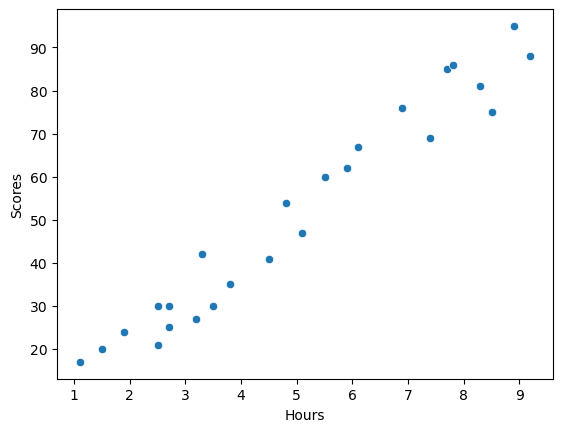

In [6]:
sns.scatterplot(data=df,x="Hours",y="Scores")
plt.show()

In [30]:
x = df[["Hours"]]
y = df[["Scores"]]

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((20, 1), (5, 1), (20, 1), (5, 1))

In [33]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [65]:
slope = lr.intercept_+x*lr.coef_
slope = slope["Hours"].values

In [66]:
slope

array([27.1857288 , 52.70292295, 34.05574261, 86.07156145, 37.00003424,
       17.37142335, 92.94157527, 56.62864513, 84.10870037, 29.14858989,
       78.2201171 , 60.5543673 , 46.81433968, 35.03717315, 13.44570118,
       89.99728363, 27.1857288 , 21.29714553, 62.51722839, 75.27582547,
       29.14858989, 49.75863132, 39.94432587, 70.36867275, 79.20154764])

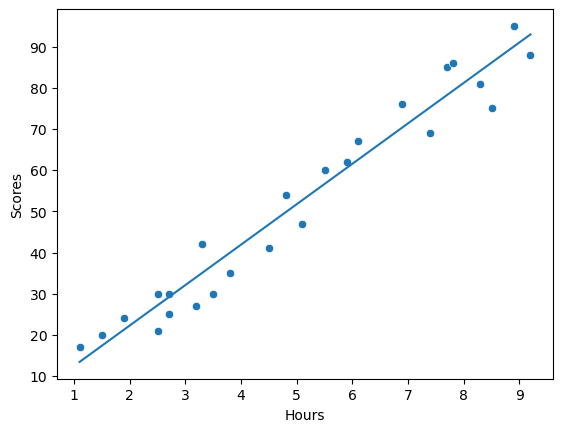

In [67]:
sns.scatterplot(data=df,x="Hours",y="Scores")
sns.lineplot(x=x["Hours"],y=slope)
plt.show()

In [75]:
ypred = lr.predict(xtest)

In [76]:
print("MAE:",mean_absolute_error(ytest,ypred))
print("MAPE:",mean_absolute_percentage_error(ytest,ypred))
print("RMSE:",mean_squared_error(ytest,ypred,squared=False))

MAE: 5.632881746692995
MAPE: 0.16433723466830424
RMSE: 5.856684262506168


In [87]:
samp_in = 9.25
samp_out = float(lr.predict([[samp_in]]))

In [88]:
print("NO of Hours:",samp_in)
print("Predicted Score",samp_out)

NO of Hours: 9.25
Predicted Score 93.43229053722452
